In [34]:
from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-table-data.csv")
df

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,150989419,1934.196902,5734689,73.462219,870405,3173576,40.65398,93573,1.198684,14661,NaN
1,United States of America,Americas,31948761,9652.120000,355341,107.350000,59590,569722,172.12000,4781,1.440000,886,Community transmission
2,India,South-East Asia,19164969,1388.760000,2554488,185.110000,401993,211853,15.35000,22309,1.620000,3523,Clusters of cases
3,Brazil,Americas,14590678,6864.280000,422705,198.860000,69389,401186,188.74000,17684,8.320000,3001,Community transmission
4,France,Europe,5529820,8502.270000,172180,264.730000,24120,103830,159.64000,1986,3.050000,290,Community transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
234,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
235,Tonga,Western Pacific,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases
236,Turkmenistan,Europe,0,0.000000,0,0.000000,0,0,0.00000,0,0.000000,0,No cases


In [36]:
df=df.drop(['WHO Region','Cases - cumulative total per 100000 population','Cases - newly reported in last 7 days per 100000 population','Deaths - cumulative total per 100000 population','Deaths - newly reported in last 7 days per 100000 population','Transmission Classification'],axis=1)

df

,Name,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours
0,Global,150989419,5734689,870405,3173576,93573,14661
1,United States of America,31948761,355341,59590,569722,4781,886
2,India,19164969,2554488,401993,211853,22309,3523
3,Brazil,14590678,422705,69389,401186,17684,3001
4,France,5529820,172180,24120,103830,1986,290
...,...,...,...,...,...,...,...
233,Saint Helena,0,0,0,0,0,0
234,Tokelau,0,0,0,0,0,0
235,Tonga,0,0,0,0,0,0
236,Turkmenistan,0,0,0,0,0,0


In [37]:
df=df.set_index('Name')
df

,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours
Name,,,,,,
Global,150989419,5734689,870405,3173576,93573,14661
United States of America,31948761,355341,59590,569722,4781,886
India,19164969,2554488,401993,211853,22309,3523
Brazil,14590678,422705,69389,401186,17684,3001
France,5529820,172180,24120,103830,1986,290
...,...,...,...,...,...,...
Saint Helena,0,0,0,0,0,0
Tokelau,0,0,0,0,0,0
Tonga,0,0,0,0,0,0


In [38]:
df['Recovered']=df['Cases - cumulative total']-df['Deaths - cumulative total']
df

,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Recovered
Name,,,,,,,
Global,150989419,5734689,870405,3173576,93573,14661,147815843
United States of America,31948761,355341,59590,569722,4781,886,31379039
India,19164969,2554488,401993,211853,22309,3523,18953116
Brazil,14590678,422705,69389,401186,17684,3001,14189492
France,5529820,172180,24120,103830,1986,290,5425990
...,...,...,...,...,...,...,...
Saint Helena,0,0,0,0,0,0,0
Tokelau,0,0,0,0,0,0,0
Tonga,0,0,0,0,0,0,0


In [48]:
country_name=input("Enter a country name to get the covid details about that country: ")

Enter a country name to get the covid details about that country: Brazil


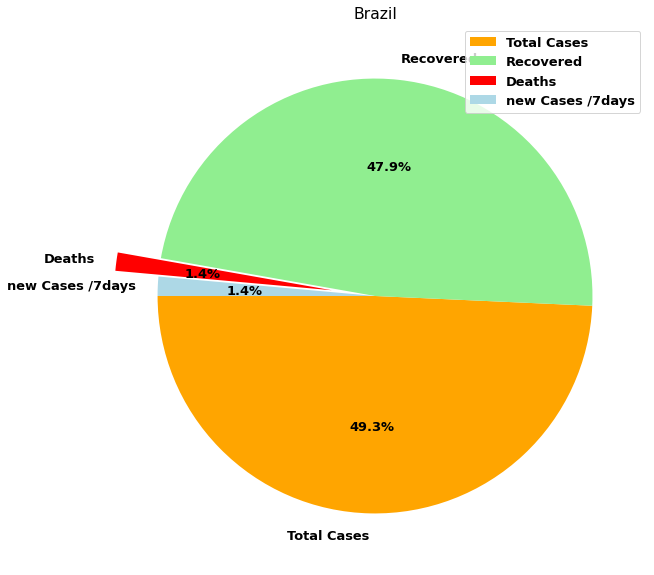

In [49]:
total_cases=df.at[country_name,'Cases - cumulative total']
recovered=df.at[country_name,'Recovered']
deaths=df.at[country_name,'Deaths - cumulative total']
newcases_in_7_days=df.at[country_name,'Cases - newly reported in last 7 days']
f=plt.figure(figsize=(10,10)) 
font = {'family' : 'Poppins',
        'weight' : 'bold',
        'size'   : 13}
plt.rc('font',**font)
plt.rcParams.update({'text.color' : "black",'axes.labelcolor' : "black"})
plt.pie([total_cases,recovered,deaths,newcases_in_7_days],labels=['Total Cases','Recovered','Deaths','new Cases /7days'],colors = ['orange','lightgreen','red','lightblue'],explode=(0,0,0.2,0.0),startangle = 180,autopct = '%1.1f%%')
plt.title(country_name)
plt.legend()
plt.show()